<a href="https://colab.research.google.com/github/MarinaIMadh/Computer_Vision/blob/main/M3_exercise_solution/ex4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generate synthetic image with random blobs

<ipython-input-16-c5f852d02107>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image) # visualize image using imshow function
<ipython-input-16-c5f852d02107>:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


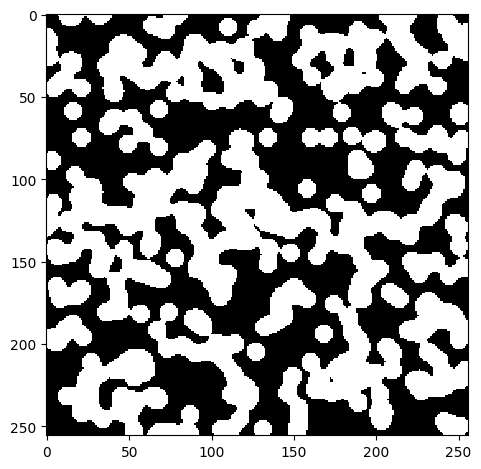

In [16]:
from skimage import data
import numpy as np
from skimage import data, io, morphology
import matplotlib.pyplot as plt

data.binary_blobs(length=5, blob_size_fraction=0.2)
np.array([[ True, False,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [False,  True, False,  True,  True],
       [ True, False, False,  True,  True],
       [ True, False, False, False,  True]])
image = data.binary_blobs(length=256, blob_size_fraction=0.05)

io.imshow(image) # visualize image using imshow function
io.show()

2. Object segmentation and labeling


*   Segmentation of blobs using Otsu's optimal threshold
*   Labeling connected regions
*   Visualization

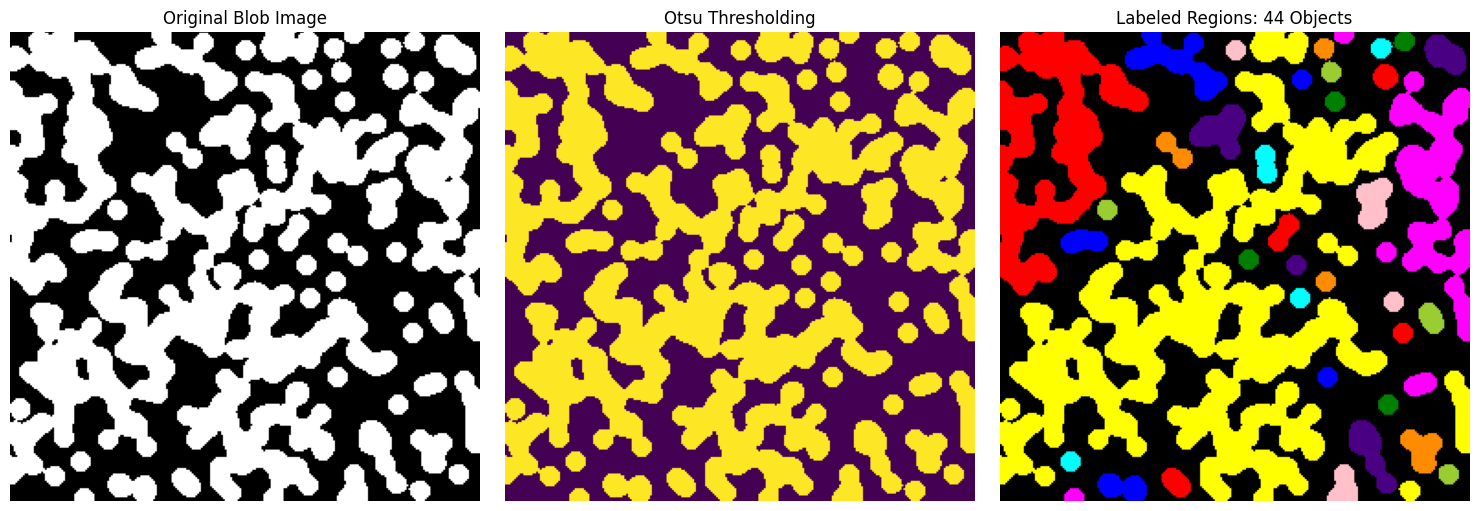

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, measure, color, morphology
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Apply Otsu's threshold to segment the blobs
thresh = threshold_otsu(image)
binary = image > thresh

# Label connected components
labeled_image = measure.label(binary, connectivity=2)

# Apply a colormap to the labeled image
colored_labels = color.label2rgb(labeled_image, bg_label=0)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Blob Image")
axes[0].axis('off')

axes[1].imshow(binary)
axes[1].set_title("Otsu Thresholding")
axes[1].axis('off')

axes[2].imshow(colored_labels)
axes[2].set_title(f"Labeled Regions: {labeled_image.max()} Objects")
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, filters, measure, color

# Step 1: Generate synthetic image with blobs
image = data.binary_blobs(length=256, blob_size_fraction=0.05, n_dim=2).astype(float)

# Step 2: Segment using Otsu threshold
threshold = filters.threshold_otsu(image)
binary = image > threshold

# Step 3: Label connected regions
labeled_image = measure.label(binary, connectivity=2)

# Step 4: Extract region properties into a DataFrame
properties = ['label', 'area', 'centroid', 'eccentricity', 'bbox', 'perimeter']
region_props = measure.regionprops_table(labeled_image, properties=properties)

df = pd.DataFrame(region_props)

# Display first few rows
print(df.head())


   label    area  centroid-0  centroid-1  eccentricity  bbox-0  bbox-1  \
0      1   574.0   18.592334    8.118467      0.857646       0       0   
1      2  3182.0   48.798554   40.151791      0.623252       0       0   
2      3   422.0    7.142180  122.255924      0.917124       0     104   
3      4  2336.0   30.125428  214.105736      0.848951       0     179   
4      5   579.0   20.036269   81.588946      0.857182       1      69   

   bbox-2  bbox-3   perimeter  
0      39      22  117.941125  
1      97      80  492.960461  
2      17     142   97.597980  
3      69     256  421.220346  
4      40      95  138.325902  


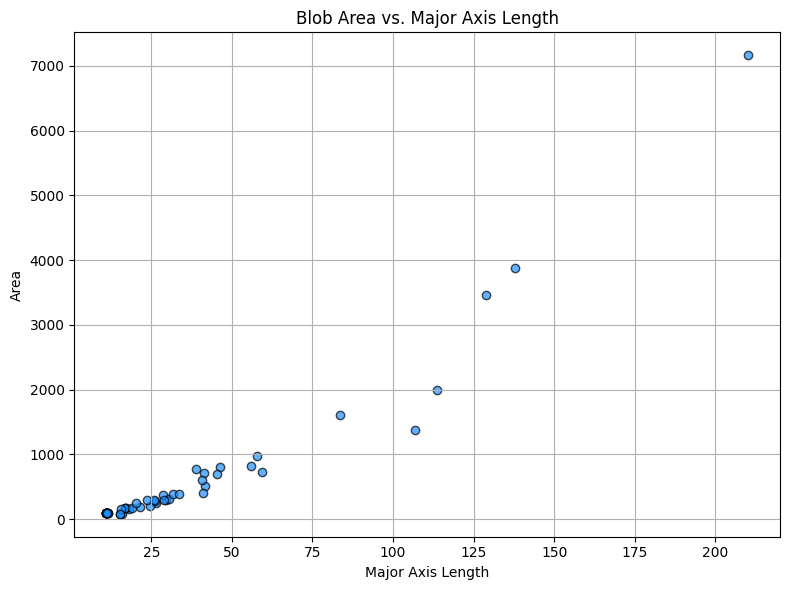

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data, filters, measure

# Generate and segment blobs
image = data.binary_blobs(length=256, blob_size_fraction=0.05).astype(float)
binary = image > filters.threshold_otsu(image)
labeled = measure.label(binary, connectivity=2)

# Extract region properties
props = measure.regionprops_table(
    labeled,
    properties=['area', 'major_axis_length']
)
df = pd.DataFrame(props)

# Scatter plot: Area vs Major Axis Length
plt.figure(figsize=(8, 6))
plt.scatter(df['major_axis_length'], df['area'], color='dodgerblue', edgecolor='k', alpha=0.7)
plt.title('Blob Area vs. Major Axis Length')
plt.xlabel('Major Axis Length')
plt.ylabel('Area')
plt.grid(True)
plt.tight_layout()
plt.show()



In [23]:
# Mean area
mean_area = df['area'].mean()

# Count blobs above average
num_large_blobs = (df['area'] > mean_area).sum()
num_small_blobs = (df['area'] <= mean_area).sum()

print(f"Number of large blobs (area > average): {num_large_blobs}")
print(f"Number of small blobs (area <= average): {num_small_blobs}")


Number of large blobs (area > average): 13
Number of small blobs (area <= average): 37


In [24]:
# Find labels
large_labels = df.loc[df['area'] > mean_area].index + 1  # regionprops labels start from 1
small_labels = df.loc[df['area'] <= mean_area].index + 1

print(f"Large blob labels: {large_labels.tolist()}")
print(f"Small blob labels: {small_labels.tolist()}")


Large blob labels: [3, 6, 12, 16, 23, 27, 29, 30, 33, 34, 35, 40, 45]
Small blob labels: [1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 31, 32, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50]


In [25]:
# Masks
large_mask = np.isin(labeled, large_labels)
small_mask = np.isin(labeled, small_labels)


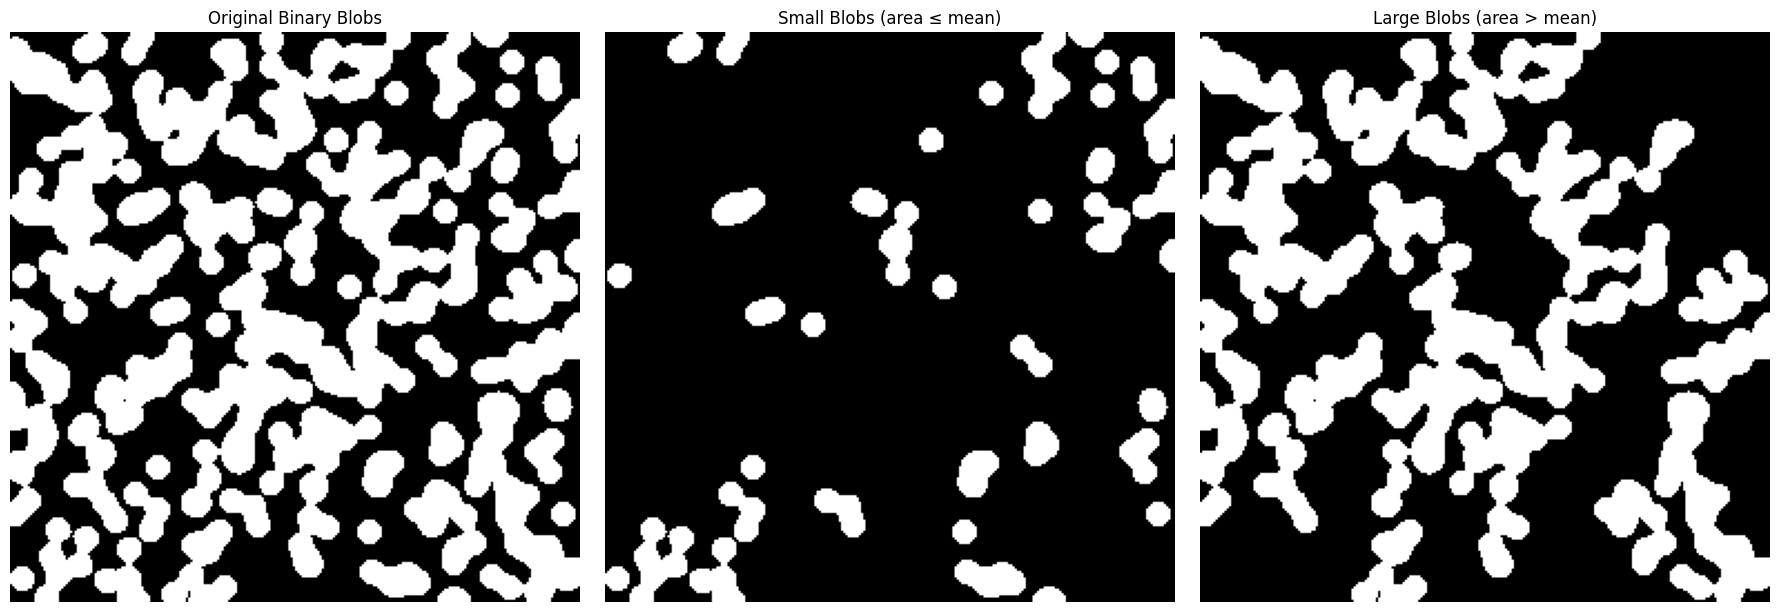

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original binary blob image
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original Binary Blobs')
axes[0].axis('off')

# Small blobs mask
axes[1].imshow(small_mask, cmap='gray')
axes[1].set_title('Small Blobs (area ≤ mean)')
axes[1].axis('off')

# Large blobs mask
axes[2].imshow(large_mask, cmap='gray')
axes[2].set_title('Large Blobs (area > mean)')
axes[2].axis('off')

plt.tight_layout()
plt.show()



In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, feature
from skimage import filters

# Generate synthetic binary blobs (grayscale image)
image = data.binary_blobs(length=256, blob_size_fraction=0.05).astype(float)

# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

# Calculate GLCM for distance=1 and angle=0 (right neighbor)
glcm = feature.graycomatrix(image_int, distances=[1], angles=[0], symmetric=True, normed=True)

# Extract texture features from GLCM
contrast = feature.graycoprops(glcm, 'contrast')
dissimilarity = feature.graycoprops(glcm, 'dissimilarity')
homogeneity = feature.graycoprops(glcm, 'homogeneity')
energy = feature.graycoprops(glcm, 'energy')
correlation = feature.graycoprops(glcm, 'correlation')

# Print texture features
print("Contrast:", contrast)
print("Dissimilarity:", dissimilarity)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)

Contrast: [[3760.25390625]]
Dissimilarity: [[14.74609375]]
Homogeneity: [[0.94217307]]
Energy: [[0.66747096]]
Correlation: [[0.88434407]]


    label    contrast  dissimilarity  homogeneity    energy  correlation
0       1   34.863281       0.136719     0.999464  0.996084     0.926356
1       2   23.906250       0.093750     0.999632  0.996634     0.942123
2       3   25.898438       0.101562     0.999602  0.995642     0.952006
3       4   57.773438       0.226562     0.999112  0.993795     0.922630
4       5  841.699219       3.300781     0.987056  0.874671     0.941738
5       6   21.914063       0.085938     0.999663  0.998346     0.886429
6       7   65.742188       0.257812     0.998989  0.989052     0.951314
7       8   83.671875       0.328125     0.998713  0.990157     0.929699
8       9   29.882812       0.117188     0.999540  0.995306     0.948399
9      10   63.750000       0.250000     0.999020  0.993856     0.913021
10     11   23.906250       0.093750     0.999632  0.998285     0.879816
11     12  111.562500       0.437500     0.998284  0.986167     0.933403
12     13  121.523438       0.476562     0.998131  

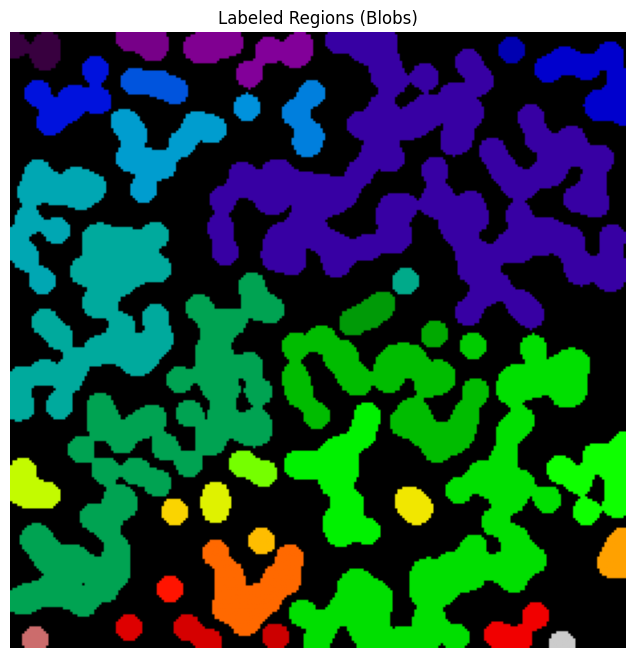

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, measure, feature
from skimage import filters

# Generate synthetic binary blobs (grayscale image)
image = data.binary_blobs(length=256, blob_size_fraction=0.05).astype(float)

# Convert to integer image (GLCM requires integer values)
image_int = (image * 255).astype(np.uint8)

# Step 1: Label connected regions (blobs) in the image
labeled_image = measure.label(image)

# Step 2: Initialize an empty list to store texture features for each blob
blob_properties = []

# Step 3: Loop through each labeled region (blob)
for region in measure.regionprops(labeled_image):
    # Get the label of the current region (blob)
    label = region.label

    # Extract the binary mask of the current blob
    blob_mask = labeled_image == label

    # Calculate the GLCM for the blob (use the mask to extract just the blob's area)
    glcm = feature.graycomatrix(image_int * blob_mask, distances=[1], angles=[0], symmetric=True, normed=True)

    # Extract texture features from GLCM
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = feature.graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]

    # Store the features in the list
    blob_properties.append({
        'label': label,
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation
    })

# Step 4: Convert the list of blob properties into a pandas DataFrame
df_blob_properties = pd.DataFrame(blob_properties)

# Display the DataFrame with texture features for each blob
print(df_blob_properties)

# Optional: Plot the original image with labeled regions
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labeled_image, cmap='nipy_spectral')
ax.set_title("Labeled Regions (Blobs)")
ax.axis('off')
plt.show()
